<a href="https://colab.research.google.com/github/mdgalvez/Phyton_PROJECT-1/blob/master/Unit_3_Project_1_verA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


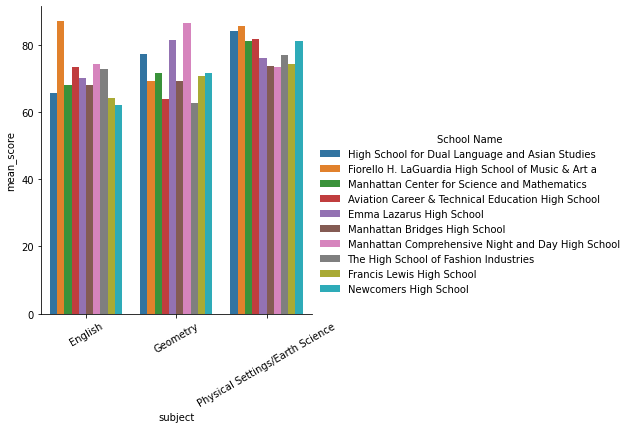

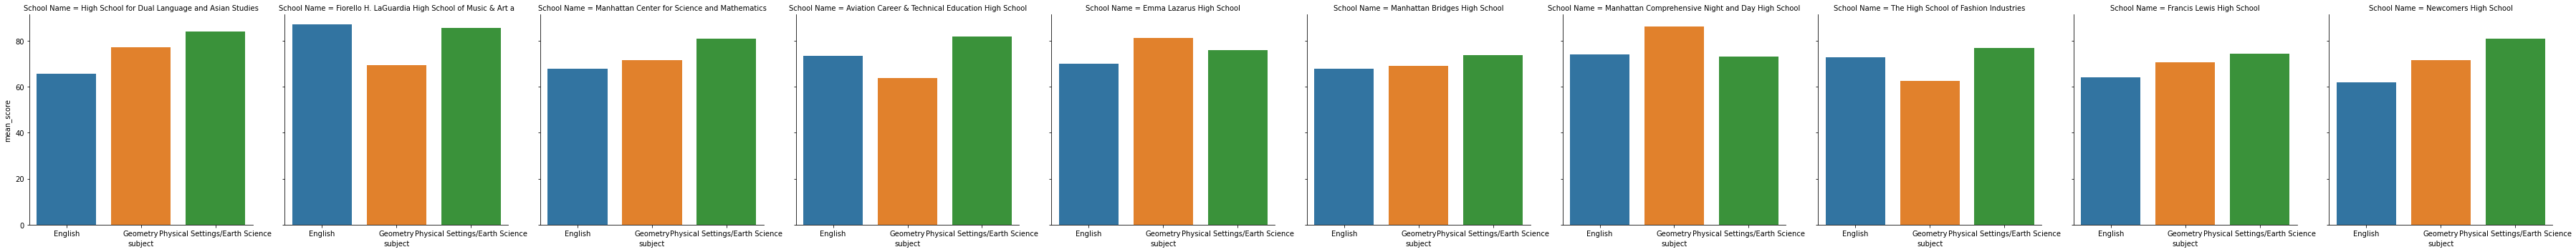

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

missing_values = ["s","na"]
data = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)


pd.set_option('max_rows', 99999)
#filter column 
df = pd.DataFrame(data,columns=['School Name','School Level','Regents Exam','Year','Mean Score'])
#df
#rename column
df_rename = df.rename(columns={'Mean Score':'mean_score' ,'Regents Exam':'subject','School Level':'level'})
#df_new

# removed non numeric value in score column
#df_rename = df_new[pd.to_numeric(df_rename['mean_score'], errors='coerce').notnull()]
#df_rename['mean_score'] =  pd.to_numeric(df_rename['mean_score'], downcast='float')

#create filter data
subjects = ['Physical Settings/Earth Science','English','Geometry']
df_2016_highschool = df_rename[df_rename.Year.eq(2016) &  df_rename.level.eq('High school') & df_rename.subject.isin(subjects)]

# Get Max mean for school 
df_2016_highschool["group_median_rank"] = df_2016_highschool.groupby(["School Name","subject"])["mean_score"].rank(ascending=0,method='dense')
df_median = df_2016_highschool[df_2016_highschool['group_median_rank'] == 1]

# Removed duplicate record
df_subject = df_median.drop_duplicates()

#Get only school with this 3 subject exists
df_rank = df_subject.groupby('School Name').filter(lambda x: len(x) > 2)

#Get top ten school base on average of 3 subjects
df_rank['mean_rank'] = df_rank.groupby('School Name').mean_score.transform(np.mean).rank(ascending=0,method='dense')
df_top_ten_school = df_rank[df_rank['mean_rank'] < 11]

chart = sns.factorplot(x='subject', y='mean_score', hue='School Name', data=df_top_ten_school, kind='bar')
chart.set_xticklabels(rotation=30)

sns.factorplot("subject", "mean_score", col="School Name", data=df_top_ten_school, kind="bar")






